In [1]:
import pandas as pd

# Load structured + unstructured datasets
df_structured = pd.read_csv("Advanced patient dataset.csv")  # Replace with your structured CSV
df_structured.drop('Patient_ID', axis=1 , inplace = True)
df_unstructured = pd.read_csv("unstructured_patient_dataset.csv")

# Unstructured dataset has 'input_text', so extract symptom column for training
df_unstructured["Symptoms"] = df_unstructured["Symptoms"].str.lower()  # Or extract using BERT if needed

# Combine datasets
df_combined = pd.concat([df_structured,df_unstructured],ignore_index=True)

df_combined

,Symptoms,Severity,Suggested Doctor,Possible Disease
0,"joint pain, back pain, fever, dizziness",Severe,Rheumatologist,Spondylosis
1,"dizziness, shortness of breath, nausea, anxiet...",Severe,Neurologist,Migraine
2,"anxiety, weight loss, depression, sore throat",Severe,Psychiatrist,Mental Health Disorder
3,"sore throat, weight loss, headache, dizziness",Severe,Neurologist,Migraine
4,"back pain, blurred vision, chest pain, depress...",Severe,Orthopedic,Undiagnosed
...,...,...,...,...
9995,"there are signs of depression, anxiety, fever ...",Severe,Psychiatrist,Mental Health Disorder
9996,"these days i'm facing headache, shortness of b...",Severe,Neurologist,Undiagnosed
9997,i have symptoms like blurred vision and abdomi...,Mild,Ophthalmologist,Undiagnosed
9998,i have symptoms like joint pain and anxiety.,Mild,Rheumatologist,Undiagnosed


In [2]:
from sklearn.utils import shuffle
dataset= shuffle(df_combined, random_state=42)
dataset

,Symptoms,Severity,Suggested Doctor,Possible Disease
6252,there are signs of headache and anxiety in my ...,Mild,Neurologist,Undiagnosed
4684,"cough, blurred vision",Mild,Pulmonologist,Undiagnosed
1731,"diarrhea, vomiting, sore throat, dizziness, de...",Severe,Gastroenterologist,Undiagnosed
4742,"headache, diarrhea, back pain",Moderate,Neurologist,Undiagnosed
4521,"joint pain, nausea, rash",Moderate,Rheumatologist,Undiagnosed
...,...,...,...,...
5734,"i think i might be having dizziness, shortness...",Severe,Neurologist,Undiagnosed
5191,"my condition includes abdominal pain, back pai...",Severe,Gastroenterologist,Undiagnosed
5390,"recently, i’ve been dealing with rash and shor...",Severe,Dermatologist,Undiagnosed
860,"vomiting, joint pain, anxiety",Moderate,Gastroenterologist,Undiagnosed


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Vectorize symptoms
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(df_combined["Symptoms"].values.astype(str))

# Encode targets
le_severity = LabelEncoder()
y_sev = le_severity.fit_transform(df_combined["Severity"])

ohe = OneHotEncoder(sparse_output=False)
y_doc = ohe.fit_transform(df_combined["Suggested Doctor"].values.reshape(-1, 1))

# Combine outputs
y_combined = np.hstack((y_sev.reshape(-1, 1), y_doc))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_combined, test_size=0.2, random_state=42)

# Train XGBoost with MultiOutput
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model = MultiOutputClassifier(xgb)
model.fit(X_train, y_train)


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:33:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:33:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:33:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:33:34] WARNING: C:\actions-runner\_w

,estimator,"XGBClassifier...ree=None, ...)"
,n_jobs,None
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None


In [4]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Separate severity and doctor from predictions and ground truth
y_pred_severity = y_pred[:, 0]
y_test_severity = y_test[:, 0]

y_pred_doctor = y_pred[:, 1:]
y_test_doctor = y_test[:, 1:]

# Decode doctor labels for inverse_transform
from sklearn.exceptions import NotFittedError
try:
    valid_rows = ~np.all(y_pred_doctor == 0, axis=1)

# Only decode rows where some doctor was predicted
    y_pred_doctor_labels = ohe.inverse_transform(y_pred_doctor[valid_rows])
    y_test_doctor_labels = ohe.inverse_transform(y_test_doctor[valid_rows])
    

except ValueError as e:
    # print("❌ Error decoding doctor predictions:", e)
    y_pred_doctor_labels = ["Unknown"] * len(y_pred_doctor)
    y_test_doctor_labels = ["Unknown"] * len(y_test_doctor)

#✅ Severity Accuracy & Report
print("\n🔹 Severity Accuracy:", accuracy_score(y_test_severity, y_pred_severity))
print("🔹 Severity Classification Report:")
print(classification_report(y_test_severity, y_pred_severity, target_names=le_severity.classes_))

#✅ Doctor Accuracy (Label comparison)
print("🔹 Doctor Accuracy (filtered):", accuracy_score(y_test_doctor_labels, y_pred_doctor_labels))
print("🔹 Doctor Classification Report (filtered):")
print(classification_report(y_test_doctor_labels, y_pred_doctor_labels))




🔹 Severity Accuracy: 0.9925
🔹 Severity Classification Report:
              precision    recall  f1-score   support

        Mild       0.99      1.00      0.99       411
    Moderate       0.98      0.98      0.98       375
      Severe       1.00      1.00      1.00      1214

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

🔹 Doctor Accuracy (filtered): 0.9773445732349842
🔹 Doctor Classification Report (filtered):
                    precision    recall  f1-score   support

      Cardiologist       0.91      0.99      0.95        75
     Dermatologist       0.96      1.00      0.98        82
    ENT Specialist       0.92      1.00      0.96        83
   Endocrinologist       0.92      1.00      0.96        68
Gastroenterologist       0.98      0.98      0.98       348
 General Physician       0.99      0.98      0.98       452
       Neurologist       0.97      0.98    

<Figure size 600x500 with 0 Axes>

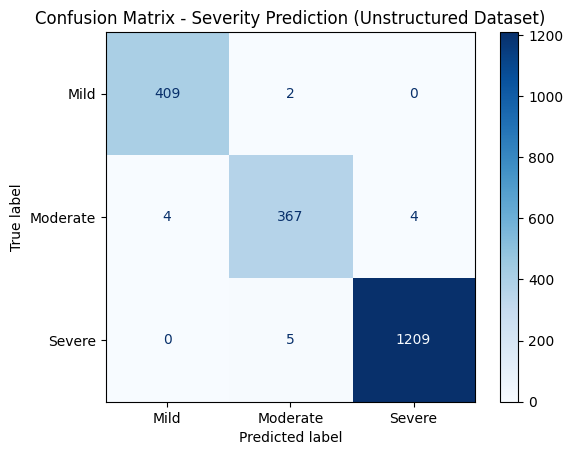

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ---------- SEVERITY CONFUSION MATRIX ----------
# True and predicted severity labels
y_true_severity = y_test[:, 0]  # from your combined label array
y_pred_severity = y_pred[:, 0]

cm_sev = confusion_matrix(y_true_severity, y_pred_severity)
disp_sev = ConfusionMatrixDisplay(confusion_matrix=cm_sev, display_labels=le_severity.classes_)

plt.figure(figsize=(6, 5))
disp_sev.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Severity Prediction (Unstructured Dataset)")
plt.show()



<Figure size 800x600 with 0 Axes>

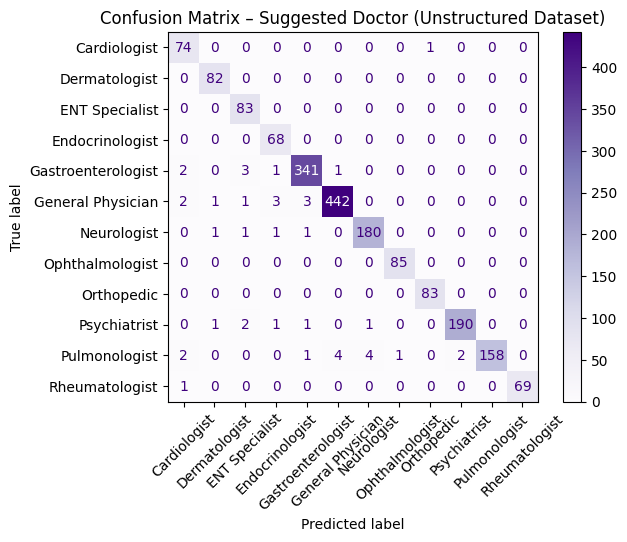

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Decode doctor only for valid one-hot predictions (no all-zeros)
valid_indices = ~np.all(y_pred[:, 1:] == 0, axis=1)

# Filter both predictions and ground truth accordingly
y_pred_valid = y_pred[valid_indices]
y_test_valid = y_test[valid_indices]

# Decode valid predictions
y_true_doc = ohe.inverse_transform(y_test_valid[:, 1:])
y_pred_doc = ohe.inverse_transform(y_pred_valid[:, 1:])

# Get doctor class labels
doctor_labels = ohe.categories_[0]

# Generate and display confusion matrix
cm_doc = confusion_matrix(y_true_doc, y_pred_doc, labels=doctor_labels)
disp_doc = ConfusionMatrixDisplay(confusion_matrix=cm_doc, display_labels=doctor_labels)

plt.figure(figsize=(8, 6))
disp_doc.plot(cmap='Purples', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix – Suggested Doctor (Unstructured Dataset)")
plt.show()


In [7]:
import joblib

# Save model components
joblib.dump(model, "unstructured_model.pkl")
joblib.dump(vectorizer, "unstructured_vectorizer.pkl")
joblib.dump(le_severity, "unstructured_severity_encoder.pkl")
joblib.dump(ohe, "unstructured_doctor_encoder.pkl")


['unstructured_doctor_encoder.pkl']

In [8]:
def predict_from_input(text):
    # Step 1: Transform input
    X_input = vectorizer.transform([text.lower()])
    
    # Step 2: Predict
    y_pred = model.predict(X_input)
    
    # Step 3: Decode severity
    severity_pred = le_severity.inverse_transform([int(y_pred[0][0])])[0]
    
    # Step 4: Decode doctor
    doctor_pred = ohe.inverse_transform([y_pred[0][1:]])[0][0]
    
    return {
        "input": text,
        "predicted_severity": severity_pred,
        "suggested_doctor": doctor_pred
    }


In [9]:
result = predict_from_input("i feel fever and cough")
if "error" in result:
    print("unable to understand the text pls switch the drop down")
else:
    print("Input_Text:", result["input"])
    print("Predicted Severity:", result["predicted_severity"])
    print("Suggested Doctor:", result["suggested_doctor"])


Input_Text: i feel fever and cough
Predicted Severity: Mild
Suggested Doctor: General Physician
